# Pca降维
使用 sklearn 的主成分分析PCA进行降维分析：

In [1]:
from sklearn.decomposition import PCA
import numpy as np

In [2]:
data = np.array([[0,10,2],[0,10,4],[0,10,6]])
data

array([[ 0, 10,  2],
       [ 0, 10,  4],
       [ 0, 10,  6]])

In [3]:
pca = PCA(n_components=1,copy=True,random_state=8)

In [4]:
newdata = pca.fit_transform(data)
print(newdata) # 降维后的样本

 # 已去均值化 

[[ 2.]
 [ 0.]
 [-2.]]


In [5]:
print(pca.components_) # 投影方向向量

[[-0.  0. -1.]]


In [6]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [7]:
iris = load_iris()

X = iris.data
y = iris.target
print(X.shape)

(150, 4)


In [8]:
iris_pca = PCA(n_components=2,copy=False,random_state=8)

X = iris_pca.fit_transform(X)
print (X.shape)

(150, 2)


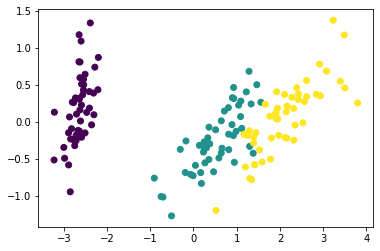

In [9]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [10]:
print(iris_pca.components_) # 两个投影方向上的向量

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


In [11]:
from sklearn.datasets import load_digits
digits = load_digits()

In [12]:
digit_data = digits.data

In [13]:
sub_data = digit_data[0:100,:]
print (sub_data.shape)

(100, 64)


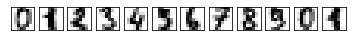

In [14]:
fig, axe = plt.subplots(1,12,subplot_kw=dict(xticks=[], yticks=[]))
for i in range(0,12):
    axe[i].imshow(sub_data[i,:].reshape((8,8)),cmap=plt.cm.binary, interpolation='nearest')

In [15]:
digit_pca = PCA(n_components=36,copy=True,whiten=False)

In [16]:
new_data = digit_pca.fit_transform(sub_data);
print(new_data.shape)

(100, 36)


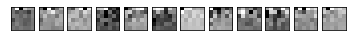

In [17]:
fig, axe = plt.subplots(1,12,subplot_kw=dict(xticks=[], yticks=[]))
for i in range(0,12):
    axe[i].imshow(new_data[i,:].reshape((6,6)),cmap=plt.cm.binary, interpolation='nearest')

# 用PCA实现高维数据可视化

一个高维数据集是无法用图形表示的，但是我们可以通过降维方法把它降成二维或三维数据来可视化。

Fisher1936年收集了三种鸢尾花分别50个样本数据（Iris Data）：Setosa、Virginica、Versicolour。解释变量是花瓣（petals）和萼片（sepals）长度和宽度的测量值，响应变量是花的种类。鸢尾花数据集经常用于分类模型测试，scikit-learn中也有。让我们把iris数据集降成方便可视化的二维数据：

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [19]:
# 导入鸢尾花数据集和PCA估计器。PCA类把主成分的数量作为超参数，和其他估计器一样，PCA也用fit_transform()返回降维的数据矩阵：
data = load_iris()
y = data.target
X = data.data
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)

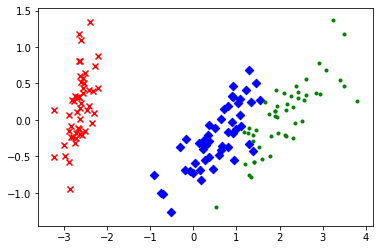

In [20]:
# 画图
red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []

for i in range(len(reduced_X)):
    if y[i] == 0:
        red_x.append(reduced_X[i][0])
        red_y.append(reduced_X[i][1])
    elif y[i] == 1:
        blue_x.append(reduced_X[i][0])
        blue_y.append(reduced_X[i][1])
    else:
        green_x.append(reduced_X[i][0])
        green_y.append(reduced_X[i][1])

plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.scatter(green_x, green_y, c='g', marker='.')
plt.show()

# 从这个二维数据图中可以明显看出，有一个类与其他两个重叠的类完全分离。这个结果可以帮助我们选择分类模型。

In [30]:
from os import walk, path
import numpy as np
import mahotas as mh
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [31]:
X = []
y = []

In [32]:
# 把照片导入Numpy数组，然后把它们的像素矩阵转换成向量：

for dir_path, dir_names, file_names in walk('mlslpic/att-faces/'):
    for fn in file_names:
        if fn[-3:] == 'pgm':
            image_filename = path.join(dir_path, fn)
            X.append(scale(mh.imread(image_filename, as_grey=True).reshape(10304).astype('float32')))
            y.append(dir_path)

X = np.array(X)

# 用交叉检验建立训练集和测试集，在训练集上用PCA：?

d:\python37\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
d:\python37\lib\site-packages\sklearn\preprocessing\data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
d:\python37\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
d:\python37\lib\site-packages\sklearn\preprocessing\data.py:189: UserWarning: Numerical issues were encountered when scaling the data and m

d:\python37\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
d:\python37\lib\site-packages\sklearn\preprocessing\data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
d:\python37\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
d:\python37\lib\site-packages\sklearn\preprocessing\data.py:189: UserWarning: Numerical issues were encountered when scaling the data and m

d:\python37\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
d:\python37\lib\site-packages\sklearn\preprocessing\data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
d:\python37\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
d:\python37\lib\site-packages\sklearn\preprocessing\data.py:189: UserWarning: Numerical issues were encountered when scaling the data and m

In [33]:
# 把所有样本降到150维，然后训练一个逻辑回归分类器。数据集包括40个类；scikit-learn底层会自动用one versus all策略创建二元分类器：

X_train, X_test, y_train, y_test = train_test_split(X, y)
pca = PCA(n_components=150)

In [34]:
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

print('训练集数据的原始维度是：{}'.format(X_train.shape))
print('PCA降维后训练集数据是：{}'.format(X_train_reduced.shape))

classifier = LogisticRegression()
accuracies = cross_val_score(classifier,X_train_reduced,y_train)
# 训练集数据的原始维度是：(300, 10304)
# PCA降维后训练集数据是：(300, 150)
# 最后，我们用交叉验证和测试集评估分类器的性能。分类器的平均综合评价指标（F1 score）是0.88，
# 但是需要花费更多的时间训练，在更多训练实例的应用中可能会更慢。

训练集数据的原始维度是：(299, 10304)
PCA降维后训练集数据是：(299, 150)


d:\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\python37\lib\site-packages\sklearn\model_selection\_validation.py:528: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'mlslpic/att-faces/'

In [35]:
print('交叉验证准确率是：{}\n{}'.format(np.mean(accuracies), accuracies))
classifier.fit(X_train_reduced, y_train)
predictions = classifier.predict(X_test_reduced)
print(classification_report(y_test, predictions))

NameError: name 'accuracies' is not defined